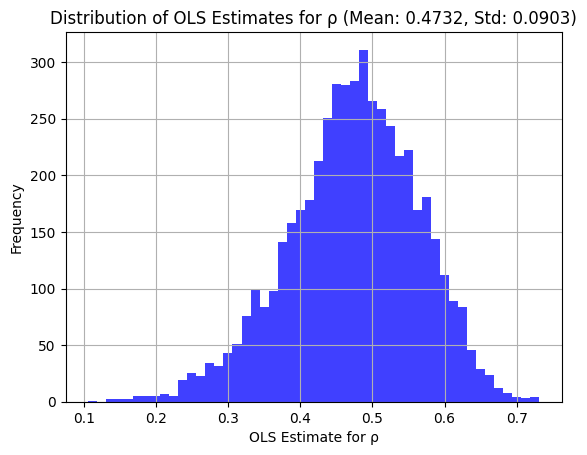

(np.float64(0.47323855425049116), np.float64(0.09034908788397719))

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Parameters
T = 100        # Number of observations
rho = 0.5      # AR(1) parameter
num_sim = 5000 # Number of Monte Carlo simulations

# Function to generate AR(1) process
def generate_ar1(T, rho):
    y = np.zeros(T)
    epsilon = np.random.normal(0, 1, T)
    for t in range(1, T):
        y[t] = rho * y[t-1] + epsilon[t]
    return y

# Monte Carlo simulation
rho_estimates = []
for _ in range(num_sim):
    # Generate AR(1) sample
    y = generate_ar1(T, rho)
    
    # OLS estimate for rho
    X = sm.add_constant(y[:-1]) # Add constant term for OLS regression
    model = sm.OLS(y[1:], X).fit()
    rho_hat = model.params[1] # Coefficient estimate for rho
    rho_estimates.append(rho_hat)

# Convert results to numpy array for analysis
rho_estimates = np.array(rho_estimates)

# Display mean and standard deviation of the distribution of rho estimates
mean_rho = np.mean(rho_estimates)
std_rho = np.std(rho_estimates)

# Plot the distribution of OLS estimates for rho
plt.hist(rho_estimates, bins=50, alpha=0.75, color='blue')
plt.title(f'Distribution of OLS Estimates for ρ (Mean: {mean_rho:.4f}, Std: {std_rho:.4f})')
plt.xlabel('OLS Estimate for ρ')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print the mean and standard deviation
mean_rho, std_rho